<a href="https://colab.research.google.com/github/EduardoMoraesRitter/deep-learning-tensorflow-python/blob/main/2%20-%20Previsao_Lucros_um_perceptron_DL_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

- Base de dados:
  - Input (X): Temperatura
  - Output (Y): Lucro diário em dólares 

# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.4.1'

# Etapa 2: Importação da base de dados

In [ ]:
# Leitura do arquivo csv
df = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/deep-learning-tensorflow-python/main/SalesData.csv')
#remover o indece
df.reset_index(drop=True, inplace=True)

In [ ]:
# Visualização de todos os registros
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
# Visualização dos 5 primeiros registros
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
# Visualização dos 10 últimos registros
df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
# Visualização de informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
# Descrição da base de dados
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3: Visualização da base de dados

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


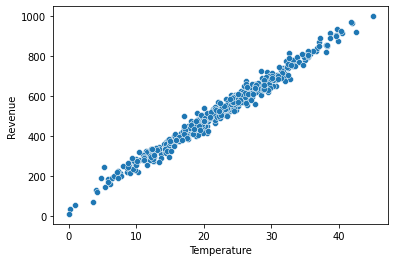

In [ ]:
# Scatter plot do Seborn
sns.scatterplot(df['Temperature'], df['Revenue']);

# Etapa 4: Criação das variáveis da base de dados

In [ ]:
# Criação das variáveis X_train e y_train
X_train = df['Temperature']
Y_train = df['Revenue']

In [ ]:
# Formato da variável X_train
X_train.shape

(500,)

In [ ]:
# Formato da variável y_train
Y_train.shape

(500,)

# Etapa 5: Criação e construção do modelo

In [ ]:
# Construção do modelo sequencial
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_shape=[1]))

#como o loss esta grande 646.5796,  entao precisa de outra camada densa
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
# Sumário do modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [ ]:
# Treinamento
epochs_hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 223456.3235
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 17182.1138
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 5836.8637
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 1802.8257
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 899.4964
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 720.2412
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 766.8171
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 668.7715
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 676.8948
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 736.5132
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 654.7561
Epoch 12/100
16/16 [==============================] - 0s 2ms/step - loss: 649.7973
Epoch 

# Etapa 6: Avaliação do modelo 

In [ ]:
# Visualização do dicionário com os resultados
epochs_hist.history.keys()

dict_keys(['loss'])

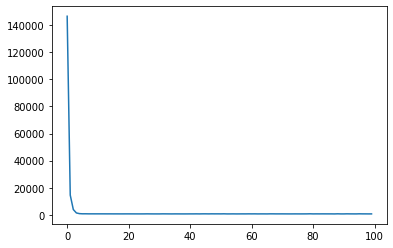

In [ ]:
# Gráfico com os resultados da loss function
plt.plot(epochs_hist.history['loss'])

In [ ]:
# Visualização dos pesos
model.get_weights()

[array([[ 0.12653412,  2.1508667 , -1.6944203 ,  0.33822787,  1.0408808 ,
          1.4536147 ,  1.6428697 , -0.6513351 , -1.4629928 ,  2.2602718 ]],
       dtype=float32),
 array([ 1.22913   ,  3.640496  , -3.4068642 ,  0.06182037,  2.455315  ,
         3.3481948 ,  3.3911407 , -2.0042012 , -3.3723521 ,  3.5162868 ],
       dtype=float32),
 array([[ 0.17531192],
        [ 1.7774435 ],
        [-2.0062964 ],
        [-0.13882378],
        [ 1.1520877 ],
        [ 1.6287688 ],
        [ 1.9508177 ],
        [-0.5522298 ],
        [-1.5862515 ],
        [ 2.3326042 ]], dtype=float32),
 array([2.9493456], dtype=float32)]

In [ ]:
# Previsões com o modelo treinado, com a temperatura de 5 graus
model.predict([5])

array([[155.6291]], dtype=float32)

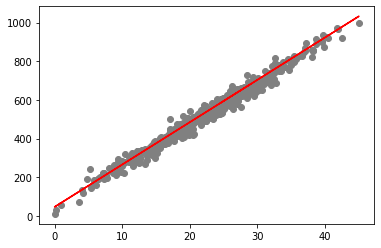

In [ ]:
# Gráfico com a reta da regressão linear
plt.scatter(X_train, Y_train, color='gray')
plt.plot(X_train, model.predict(X_train), color='red') 

# Etapa 7: Confirmar os resultados usando sklearn

In [ ]:
# Usar o sklearn para obter os mesmos resultados
X_train.shape

(500,)

In [ ]:
#transformar para Matrix
X_train = X_train.values.reshape(-1,1)

In [ ]:
X_train.shape

(500, 1)

In [ ]:
Y_train = Y_train.values.reshape(-1,1)
Y_train

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#coeficiente - peso
regressor.coef_

array([[21.44362551]])

In [ ]:
#interceptor
regressor.intercept_

array([44.83126709])

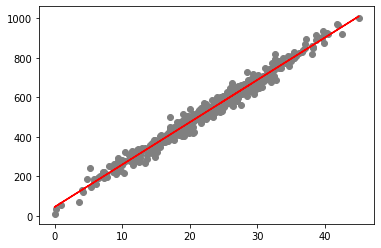

In [ ]:
plt.scatter(X_train, Y_train, color='gray')
plt.plot(X_train, regressor.predict(X_train), color='red') 

In [ ]:
#predicao com liner
regressor.predict([[5]])

array([[152.04939464]])